# FIFA21 messy dataset cleaning

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('fifa21 raw data v2.csv')
df

C:\Users\MYPC~1\AppData\Local\Temp/ipykernel_13524/1031658555.py:1: DtypeWarning: Columns (76) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('fifa21 raw data v2.csv')


,ID,Name,LongName,photoUrl,playerUrl,Nationality,Age,↓OVA,POT,Club,...,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits
0,158023,L. Messi,Lionel Messi,https://cdn.sofifa.com/players/158/023/21_60.png,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,33,93,93,\n\n\n\nFC Barcelona,...,Medium,Low,5 ★,85,92,91,95,38,65,771
1,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,https://cdn.sofifa.com/players/020/801/21_60.png,http://sofifa.com/player/20801/c-ronaldo-dos-s...,Portugal,35,92,92,\n\n\n\nJuventus,...,High,Low,5 ★,89,93,81,89,35,77,562
2,200389,J. Oblak,Jan Oblak,https://cdn.sofifa.com/players/200/389/21_60.png,http://sofifa.com/player/200389/jan-oblak/210006/,Slovenia,27,91,93,\n\n\n\nAtlético Madrid,...,Medium,Medium,3 ★,87,92,78,90,52,90,150
3,192985,K. De Bruyne,Kevin De Bruyne,https://cdn.sofifa.com/players/192/985/21_60.png,http://sofifa.com/player/192985/kevin-de-bruyn...,Belgium,29,91,91,\n\n\n\nManchester City,...,High,High,4 ★,76,86,93,88,64,78,207
4,190871,Neymar Jr,Neymar da Silva Santos Jr.,https://cdn.sofifa.com/players/190/871/21_60.png,http://sofifa.com/player/190871/neymar-da-silv...,Brazil,28,91,91,\n\n\n\nParis Saint-Germain,...,High,Medium,5 ★,91,85,86,94,36,59,595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18974,247223,Xia Ao,Ao Xia,https://cdn.sofifa.com/players/247/223/21_60.png,http://sofifa.com/player/247223/ao-xia/210006/,China PR,21,47,55,\n\n\n\nWuhan Zall,...,Medium,Medium,1 ★,64,28,26,38,48,51,NaN
18975,258760,B. Hough,Ben Hough,https://cdn.sofifa.com/players/258/760/21_60.png,http://sofifa.com/player/258760/ben-hough/210006/,England,17,47,67,\n\n\n\nOldham Athletic,...,Medium,Medium,1 ★,64,40,48,49,35,45,NaN
18976,252757,R. McKinley,Ronan McKinley,https://cdn.sofifa.com/players/252/757/21_60.png,http://sofifa.com/player/252757/ronan-mckinley...,England,18,47,65,\n\n\n\nDerry City,...,Medium,Medium,1 ★,63,39,44,46,40,53,NaN
18977,243790,Wang Zhen'ao,Zhen'ao Wang,https://cdn.sofifa.com/players/243/790/21_60.png,http://sofifa.com/player/243790/zhenao-wang/21...,China PR,20,47,57,\n\n\n\nDalian YiFang FC,...,Medium,Medium,1 ★,58,49,41,49,30,44,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18979 entries, 0 to 18978
Data columns (total 77 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID                18979 non-null  int64 
 1   Name              18979 non-null  object
 2   LongName          18979 non-null  object
 3   photoUrl          18979 non-null  object
 4   playerUrl         18979 non-null  object
 5   Nationality       18979 non-null  object
 6   Age               18979 non-null  int64 
 7   ↓OVA              18979 non-null  int64 
 8   POT               18979 non-null  int64 
 9   Club              18979 non-null  object
 10  Contract          18979 non-null  object
 11  Positions         18979 non-null  object
 12  Height            18979 non-null  object
 13  Weight            18979 non-null  object
 14  Preferred Foot    18979 non-null  object
 15  BOV               18979 non-null  int64 
 16  Best Position     18979 non-null  object
 17  Joined      

In [4]:
df['Height'].unique()

array(['170cm', '187cm', '188cm', '181cm', '175cm', '184cm', '191cm',
       '178cm', '193cm', '185cm', '199cm', '173cm', '168cm', '176cm',
       '177cm', '183cm', '180cm', '189cm', '179cm', '195cm', '172cm',
       '182cm', '186cm', '192cm', '165cm', '194cm', '167cm', '196cm',
       '163cm', '190cm', '174cm', '169cm', '171cm', '197cm', '200cm',
       '166cm', '6\'2"', '164cm', '198cm', '6\'3"', '6\'5"', '5\'11"',
       '6\'4"', '6\'1"', '6\'0"', '5\'10"', '5\'9"', '5\'6"', '5\'7"',
       '5\'4"', '201cm', '158cm', '162cm', '161cm', '160cm', '203cm',
       '157cm', '156cm', '202cm', '159cm', '206cm', '155cm'], dtype=object)

In [5]:
def convert_height(x):
    if 'cm' in x:
        return int(x.replace('cm', ''))
    else:
        height=x.split("'")
        return round(int(height[0])*30.48+int(height[1][:-1])*2.54)

In [6]:
df['Height']=df['Height'].apply(convert_height)

In [7]:
df['Height'].unique()

array([170, 187, 188, 181, 175, 184, 191, 178, 193, 185, 199, 173, 168,
       176, 177, 183, 180, 189, 179, 195, 172, 182, 186, 192, 165, 194,
       167, 196, 163, 190, 174, 169, 171, 197, 200, 166, 164, 198, 201,
       158, 162, 161, 160, 203, 157, 156, 202, 159, 206, 155], dtype=int64)

In [8]:
df['Weight'].unique()

array(['72kg', '83kg', '87kg', '70kg', '68kg', '80kg', '71kg', '91kg',
       '73kg', '85kg', '92kg', '69kg', '84kg', '96kg', '81kg', '82kg',
       '75kg', '86kg', '89kg', '74kg', '76kg', '64kg', '78kg', '90kg',
       '66kg', '60kg', '94kg', '79kg', '67kg', '65kg', '59kg', '61kg',
       '93kg', '88kg', '97kg', '77kg', '62kg', '63kg', '95kg', '100kg',
       '58kg', '183lbs', '179lbs', '172lbs', '196lbs', '176lbs', '185lbs',
       '170lbs', '203lbs', '168lbs', '161lbs', '146lbs', '130lbs',
       '190lbs', '174lbs', '148lbs', '165lbs', '159lbs', '192lbs',
       '181lbs', '139lbs', '154lbs', '157lbs', '163lbs', '98kg', '103kg',
       '99kg', '102kg', '56kg', '101kg', '57kg', '55kg', '104kg', '107kg',
       '110kg', '53kg', '50kg', '54kg', '52kg'], dtype=object)

In [9]:
def convert_weight(x):
    if "kg" in x:
        return int(x[:-2])
    else:
        return round(int(x[:-3])*0.45)

In [10]:
df['Weight']=df['Weight'].apply(convert_weight)

In [11]:
df['Weight'].unique()

array([ 72,  83,  87,  70,  68,  80,  71,  91,  73,  85,  92,  69,  84,
        96,  81,  82,  75,  86,  89,  74,  76,  64,  78,  90,  66,  60,
        94,  79,  67,  65,  59,  61,  93,  88,  97,  77,  62,  63,  95,
       100,  58,  98, 103,  99, 102,  56, 101,  57,  55, 104, 107, 110,
        53,  50,  54,  52], dtype=int64)

In [12]:
df.rename(columns={'Height':"Height_cm","Weight":"Weight_KG"},inplace=True)

In [13]:
df.columns

Index(['ID', 'Name', 'LongName', 'photoUrl', 'playerUrl', 'Nationality', 'Age',
       '↓OVA', 'POT', 'Club', 'Contract', 'Positions', 'Height_cm',
       'Weight_KG', 'Preferred Foot', 'BOV', 'Best Position', 'Joined',
       'Loan Date End', 'Value', 'Wage', 'Release Clause', 'Attacking',
       'Crossing', 'Finishing', 'Heading Accuracy', 'Short Passing', 'Volleys',
       'Skill', 'Dribbling', 'Curve', 'FK Accuracy', 'Long Passing',
       'Ball Control', 'Movement', 'Acceleration', 'Sprint Speed', 'Agility',
       'Reactions', 'Balance', 'Power', 'Shot Power', 'Jumping', 'Stamina',
       'Strength', 'Long Shots', 'Mentality', 'Aggression', 'Interceptions',
       'Positioning', 'Vision', 'Penalties', 'Composure', 'Defending',
       'Marking', 'Standing Tackle', 'Sliding Tackle', 'Goalkeeping',
       'GK Diving', 'GK Handling', 'GK Kicking', 'GK Positioning',
       'GK Reflexes', 'Total Stats', 'Base Stats', 'W/F', 'SM', 'A/W', 'D/W',
       'IR', 'PAC', 'SHO', 'PAS', 'DRI', '

In [14]:
df['Joined']

0         Jul 1, 2004
1        Jul 10, 2018
2        Jul 16, 2014
3        Aug 30, 2015
4         Aug 3, 2017
             ...     
18974    Jul 13, 2018
18975     Aug 1, 2020
18976     Mar 8, 2019
18977    Sep 22, 2020
18978    Jul 29, 2019
Name: Joined, Length: 18979, dtype: object

In [15]:
df['Joined']=pd.to_datetime(df['Joined'])

In [16]:
df['Joined_year']=df['Joined'].dt.year

In [17]:
df['Joined_day']=df['Joined'].dt.day

In [18]:
df['Joined_Month']=df['Joined'].dt.month

In [19]:
df['Value'].unique()

array(['€103.5M', '€63M', '€120M', '€129M', '€132M', '€111M', '€120.5M',
       '€102M', '€185.5M', '€110M', '€113M', '€90.5M', '€82M', '€17.5M',
       '€83.5M', '€33.5M', '€114.5M', '€78M', '€103M', '€109M', '€92M',
       '€10M', '€76.5M', '€89.5M', '€87.5M', '€79.5M', '€124M', '€114M',
       '€95M', '€92.5M', '€105.5M', '€88.5M', '€85M', '€81.5M', '€26M',
       '€21M', '€56M', '€67.5M', '€53M', '€36.5M', '€51M', '€65.5M',
       '€46.5M', '€61.5M', '€72.5M', '€77.5M', '€43.5M', '€32.5M', '€36M',
       '€32M', '€54M', '€49.5M', '€57M', '€66.5M', '€74.5M', '€71.5M',
       '€121M', '€99M', '€67M', '€86.5M', '€93.5M', '€70M', '€62M',
       '€66M', '€58M', '€44M', '€81M', '€37M', '€14.5M', '€46M', '€47.5M',
       '€52.5M', '€54.5M', '€34.5M', '€57.5M', '€51.5M', '€44.5M', '€55M',
       '€48M', '€60.5M', '€63.5M', '€61M', '€29M', '€58.5M', '€55.5M',
       '€42M', '€40.5M', '€43M', '€45.5M', '€34M', '€26.5M', '€42.5M',
       '€35.5M', '€45M', '€41.5M', '€40M', '€11M', '€13.5M', '

In [20]:
def format_columns(x):
    x=x.replace("€",'')
    if 'M' in x:
        return int(float(x[:-1])*1000000)
    elif 'K' in x:
        return int(float(x[:-1])*1000)
    else:
        return round(float(x))

In [21]:
df.loc[:,['Value', 'Wage', 'Release Clause']] = df[['Value', 'Wage', 'Release Clause']].applymap(format_columns)

In [22]:
df.dtypes

ID               int64
Name            object
LongName        object
photoUrl        object
playerUrl       object
                 ...  
PHY              int64
Hits            object
Joined_year      int32
Joined_day       int32
Joined_Month     int32
Length: 80, dtype: object

In [23]:
df['IR'].unique()

array(['5 ★', '3 ★', '4 ★', '2 ★', '1 ★'], dtype=object)

In [24]:
df['SM'].unique()

array(['4★', '5★', '1★', '2★', '3★'], dtype=object)

In [25]:
df['W/F'].unique()

array(['4 ★', '3 ★', '5 ★', '2 ★', '1 ★'], dtype=object)

In [26]:
df['IR']=df['IR'].str.strip('★').str.strip().astype(int)

In [27]:
df['IR'].head()

0    5
1    5
2    3
3    4
4    5
Name: IR, dtype: int32

In [28]:
df['SM']=df['SM'].str.strip('★').str.strip().astype(int)

In [29]:
df['SM'].head()

0    4
1    5
2    1
3    4
4    5
Name: SM, dtype: int32

In [30]:
df['W/F']=df['W/F'].str.strip('★').str.strip().astype(int)

In [31]:
df['W/F'].head()

0    4
1    4
2    3
3    5
4    5
Name: W/F, dtype: int32

In [32]:
df['Club']

0               \n\n\n\nFC Barcelona
1                   \n\n\n\nJuventus
2            \n\n\n\nAtlético Madrid
3            \n\n\n\nManchester City
4        \n\n\n\nParis Saint-Germain
                    ...             
18974             \n\n\n\nWuhan Zall
18975        \n\n\n\nOldham Athletic
18976             \n\n\n\nDerry City
18977       \n\n\n\nDalian YiFang FC
18978       \n\n\n\nDalian YiFang FC
Name: Club, Length: 18979, dtype: object

In [33]:
df['Club']=df['Club'].str.replace('\n','',regex=False)

In [34]:
df['Club']

0               FC Barcelona
1                   Juventus
2            Atlético Madrid
3            Manchester City
4        Paris Saint-Germain
                ...         
18974             Wuhan Zall
18975        Oldham Athletic
18976             Derry City
18977       Dalian YiFang FC
18978       Dalian YiFang FC
Name: Club, Length: 18979, dtype: object

In [35]:
df[['Wage','Value']].corr()

,Wage,Value
Wage,1.00000,0.81487
Value,0.81487,1.00000


In [36]:
import seaborn as sns

In [41]:
df['Value']=df['Value'].astype(int)

In [42]:
df['Wage']=df['Wage'].astype(int)

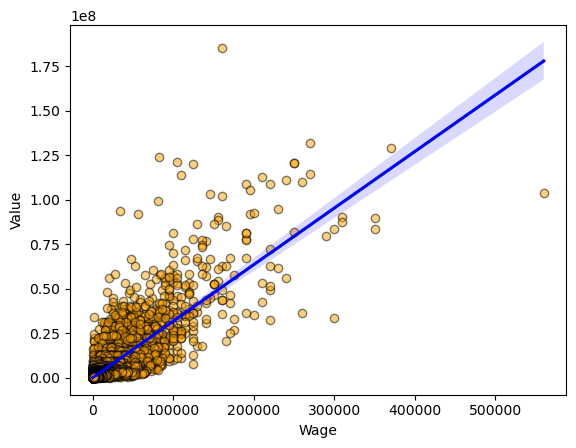

In [46]:
sns.regplot(x='Wage', 
            y='Value', 
            data=df,
            scatter_kws={'edgecolor' : 'black', 'linewidth' : 1, 'alpha':0.5, 'color' : 'orange'},
            line_kws = {'color':'blue'}
           )
plt.show()